In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [99]:
import pickle
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
x = 20

In [100]:
data = pd.read_csv('d11_2010_01_m1_pivot.csv', header=None)

In [101]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442
0,1118076,2010,21,36,40,40,40,40,40,40,...,67.1,67.2,66.6,66.7,67.3,66.2,66.5,65.9,66.6,66.9
1,1119871,2010,25,36,40,40,40,40,40,40,...,68.5,66.9,67.6,67.6,67.4,67.0,67.8,68.2,67.7,67.7
2,1119817,2010,6,36,40,40,40,40,40,40,...,69.3,69.7,69.6,70.0,69.3,70.0,69.5,70.3,69.7,69.5
3,1108434,2010,6,36,40,40,40,40,40,40,...,68.0,69.3,68.3,68.3,67.1,68.5,67.8,68.5,68.2,67.5
4,1108689,2010,9,27,30,30,30,30,30,30,...,66.8,67.6,67.2,66.8,67.0,67.4,68.2,67.2,67.6,67.5


In [105]:
pca = PCA()#n_components=x)
pca.fit(data.iloc[:,3:])

PCA(copy=True, n_components=None, whiten=False)

[ 0.66042599  0.82847531  0.88487005  0.92302414  0.93457027  0.94139338
  0.94681672  0.95117139  0.95411138  0.95687356  0.95912442  0.96106445
  0.96289795  0.96441637  0.96586702  0.96699186  0.96798326  0.9688762
  0.96966428  0.97034033]


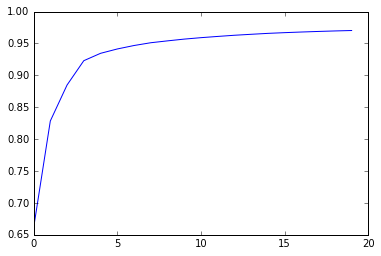

In [116]:
plt.plot(np.cumsum(pca.explained_variance_ratio_[:20]))
print np.cumsum(pca.explained_variance_ratio_[:20])

In [108]:
eigs = {}
with open('d11_2010_01_m1_eigs'+str(x)+'.pkl', 'rb') as pfile:
    eigs['eigvalues'] = pickle.load(pfile)
    eigs['eigvectors'] = pickle.load(pfile)
    eigs['mean'] = pickle.load(pfile)

In [114]:
spk_explained_variance_ratio_ = []
for i in xrange(shape(eigs['eigvalues'])[0]):
    spk_explained_variance_ratio_.append(eigs['eigvalues'][i] / sum(eigs['eigvalues']))

[ 0.66042599  0.82847531  0.88487005  0.92302414  0.93457027  0.94139338
  0.94681672  0.95117139  0.95411138  0.95687356  0.95912442  0.96106445
  0.96289795  0.96441637  0.96586702  0.96699186  0.96798326  0.9688762
  0.96966428  0.97034033]


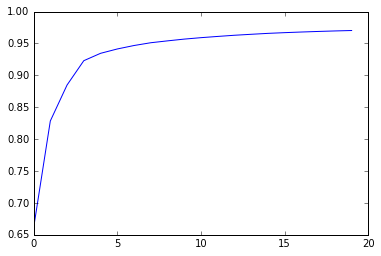

In [117]:
plt.plot(np.cumsum(spk_explained_variance_ratio_[:20]))
print np.cumsum(spk_explained_variance_ratio_[:20])

In [118]:
shape(eigs['eigvectors'])

(19, 1440)

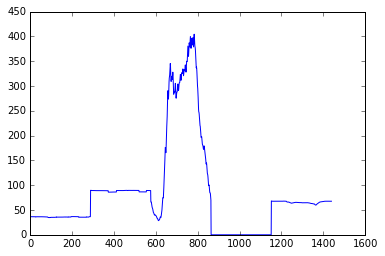

In [119]:
plt.plot(eigs['mean'])

In [129]:
shape(data.iloc[:,3:]), shape(eigs['eigvectors'][:2].T)

((19654, 1440), (1440, 2))

In [130]:
vec2proj =  np.dot(data.iloc[:,3:], eigs['eigvectors'][:2].T)

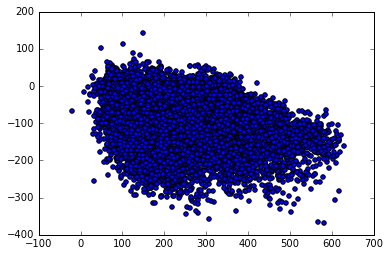

In [133]:
plt.scatter([x[0] for x in vec2proj], [y[1] for y in vec2proj])